In [19]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Membaca dataset
df = pd.read_csv('ObesityDataSet.csv')

In [21]:
# Menampilkan data pertama 
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [22]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [23]:
df.shape

(2111, 17)

In [24]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [25]:
print(df.dtypes)

Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


# EDA

In [26]:
# Mengecek missing values
df.isnull().sum()

Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

In [45]:
# Mengcek Duplikat
df.duplicated().sum()

0

In [46]:
# Mengecek Nilai Unik
df.nunique()

Age                               740
Gender                              2
Height                            868
Weight                            871
CALC                                3
FAVC                                2
FCVC                              396
NCP                               195
SCC                                 2
SMOKE                               2
CH2O                              730
family_history_with_overweight      2
FAF                               683
TUE                               670
CAEC                                4
MTRANS                              5
NObeyesdad                          7
dtype: int64

In [47]:
# Konversi Kolom ke Numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

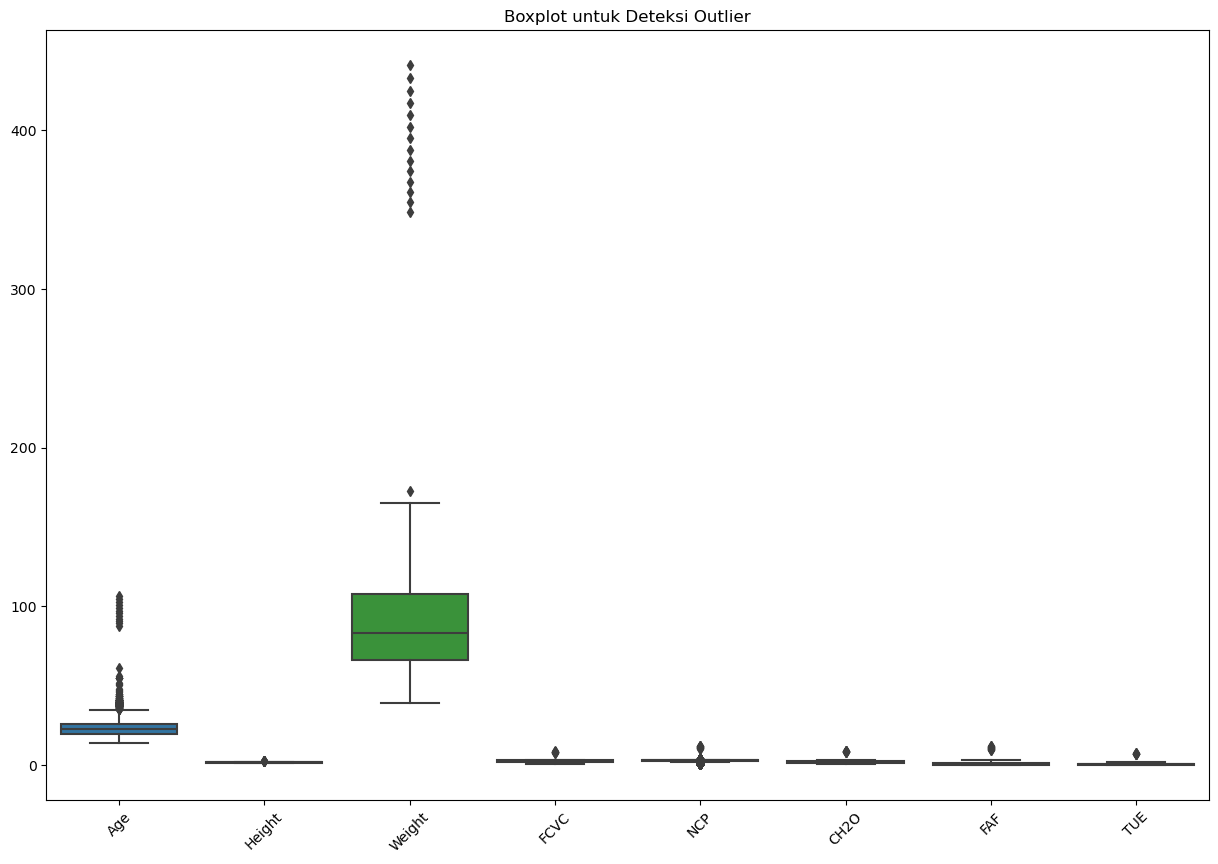

In [30]:
# Visualisasi Boxplot untuk Outlier
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

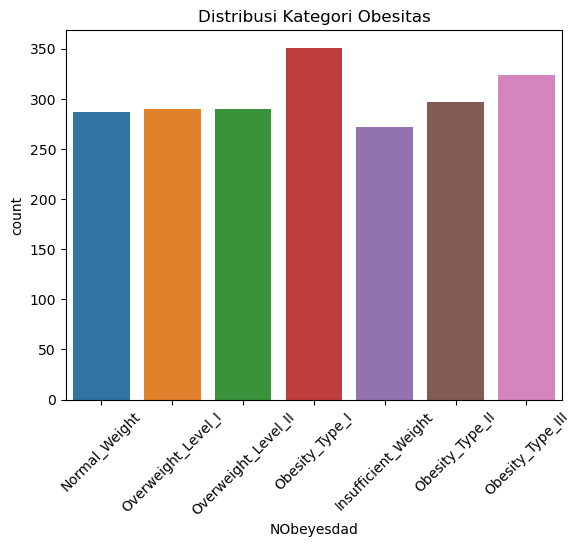

In [31]:
# Visualisasi Kelas Target
sns.countplot(x='NObeyesdad', data=df)
plt.xticks(rotation=45)
plt.title("Distribusi Kategori Obesitas")
plt.show()

# Prepocessing

In [32]:
# Menangani Missing Values & Tipe Data
df.replace(['?', ' ', 'NA', 'na', 'NaN'], np.nan, inplace=True)
df.drop_duplicates(inplace=True)

In [33]:
# Mengubah kolom numerik ke float
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [34]:
# Drop rows with missing values
df.dropna(inplace=True)

# Tangani Outlier (gunakan IQR method)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [35]:
# Mengubahbah Data Kategori Menjadi Numerik
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')  # ini target

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [36]:
# Encode label (target)
target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])

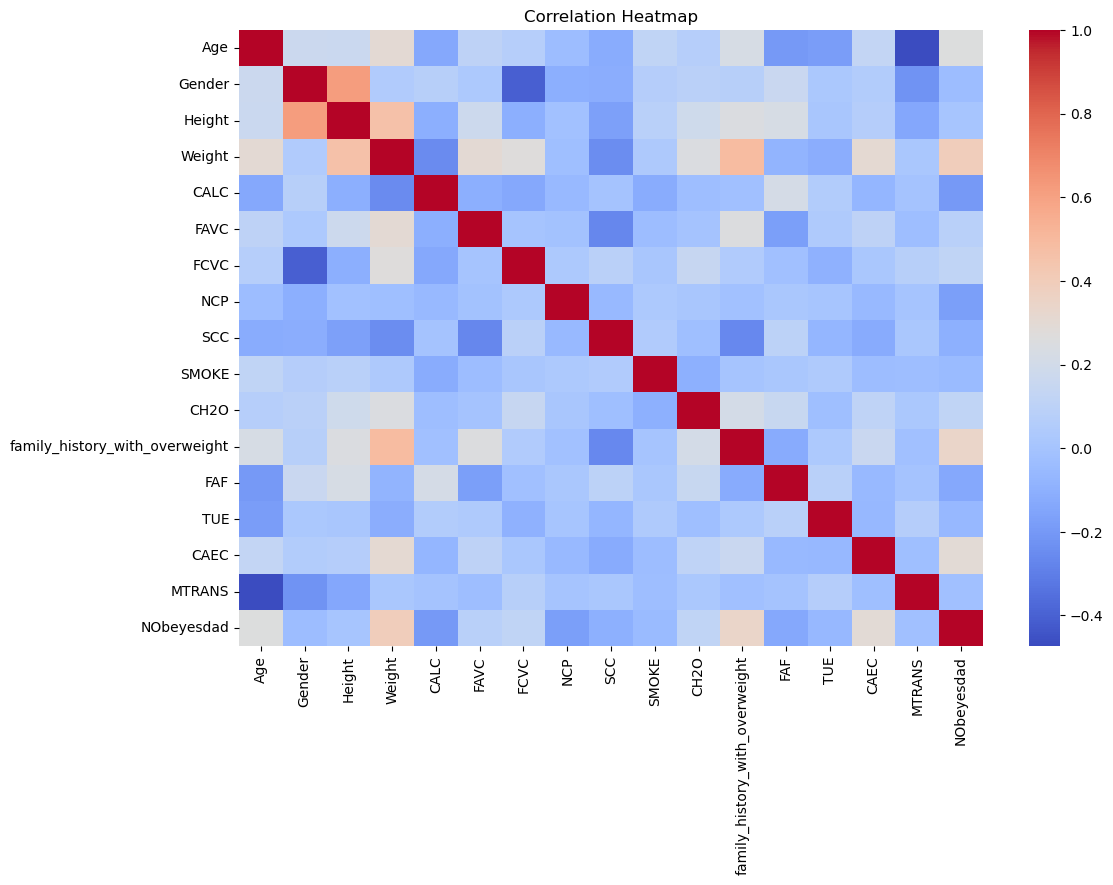

In [37]:
# Mengecek Korelasi dan Seleksi Fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [40]:
# Seleksi fitur berdasarkan korelasi
X = df.drop(columns=['NObeyesdad'])  # fitur
y = df['NObeyesdad']  # target

In [41]:
# Mengatasi Ketidakseimbangan Kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)


In [43]:
# Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

In [44]:
print("Jumlah sampel setelah SMOTE:", len(y_balanced))
print("Distribusi kelas:\n", pd.Series(y_balanced).value_counts())

Jumlah sampel setelah SMOTE: 1820
Distribusi kelas:
 NObeyesdad
1    260
5    260
2    260
6    260
3    260
0    260
4    260
Name: count, dtype: int64
